In [1]:
%pylab inline

from PyTools import err, binner
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [2]:
rc("lines", linewidth=1.0)
rc("patch", linewidth=1.0)
rc("font", family="sans-serif", serif="Helvetica", size=20)
#rc("text", usetex=False)
rc("savefig", dpi=92)
rc("legend", fontsize="x-small")
rc("xtick", labelsize="x-small")
rc("ytick", labelsize="x-small")

In [3]:
idir = "../inputs/real_deal6/"
odir = "../outputs/real_deal6/"

table = genfromtxt(odir+"REAL_DEAL_table.txt", dtype=None, names=True)
table = delete(table, where(np.isinf(table["u_mag"]))[0], axis=0)

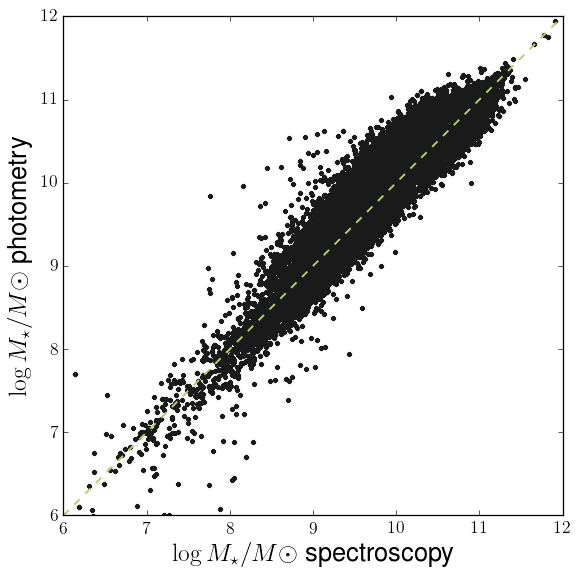

In [4]:
figure(figsize=(7, 7))

plot(log10(table["M_spec"]), log10(table["M_jpas"]), ".", color="0.1")
rm = ylim(xlim(6, 12))
plot(rm, rm, "--", lw=1.5)
gca().set_aspect("equal")

xlabel(r"$\log{M_\star/M\odot}$ spectroscopy")
ylabel(r"$\log{M_\star/M\odot}$ photometry")

savefig("mass_consistency.png", bbox_inches="tight")

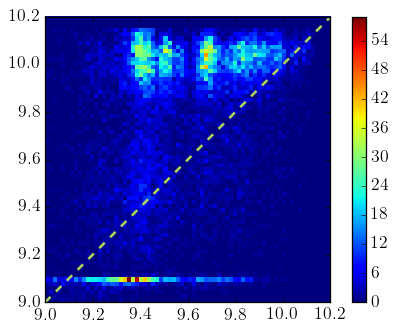

In [5]:
mask = ((table["u_mag"] - table["r_mag"])<2.22)&(table["log_Z_M_spec"]<=0.0)

hist2d(table["log_t_M_spec"][mask], table["log_t_M_jpas"][mask], 70, [[9., 10.2], [9., 10.2]])
colorbar()
#scatter(table["log_t_M_spec"], table["log_t_M_jpas"], lw=0, s=1, c="k", alpha=0.8)
#plot(table["log_t_M_spec"][mask], table["log_t_M_jpas"][mask], ".")
rm = ylim(xlim(9., 10.2))
plot(rm, rm, "--", lw=2)
gca().set_aspect("equal")

<matplotlib.colorbar.Colorbar instance at 0x7f28f6c0b098>

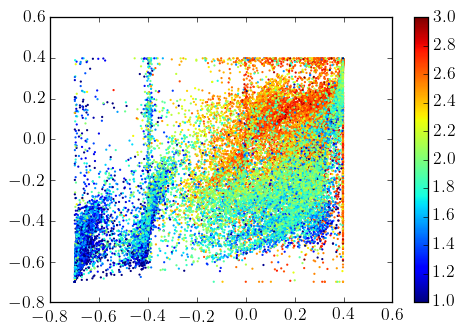

In [6]:
scatter(table["log_Z_M_spec"], table["log_Z_L_spec"], lw=0, s=3, c=table["u_mag"]-table["r_mag"], vmin=1, vmax=3)
colorbar()

(array([ 1653.,   712.,   572.,   309.,   204.,   134.,   108.,    89.,
           71.,    48.,    61.,    59.,    72.,   109.,   190.,   344.,
         1471.,  3439.,   719.,   238.,   160.,   116.,    82.,    75.,
           46.,    70.,    60.,    70.,    77.,    91.,   108.,   106.,
          146.,   125.,   130.,   151.,   163.,   166.,   165.,   235.]),
 array([-0.699   , -0.681525, -0.66405 , -0.646575, -0.6291  , -0.611625,
        -0.59415 , -0.576675, -0.5592  , -0.541725, -0.52425 , -0.506775,
        -0.4893  , -0.471825, -0.45435 , -0.436875, -0.4194  , -0.401925,
        -0.38445 , -0.366975, -0.3495  , -0.332025, -0.31455 , -0.297075,
        -0.2796  , -0.262125, -0.24465 , -0.227175, -0.2097  , -0.192225,
        -0.17475 , -0.157275, -0.1398  , -0.122325, -0.10485 , -0.087375,
        -0.0699  , -0.052425, -0.03495 , -0.017475,  0.      ]),
 <a list of 40 Patch objects>)

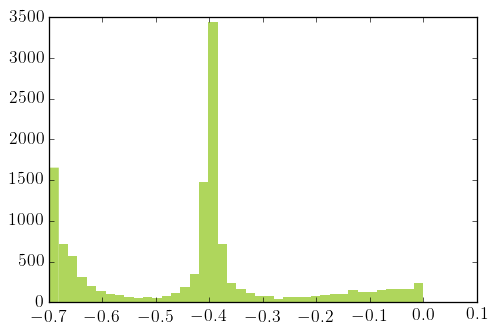

In [7]:
hist(table["log_Z_M_spec"][mask], 40, lw=0)

(array([  2.00000000e+00,   3.00000000e+00,   5.00000000e+00,
          2.10000000e+01,   1.83000000e+02,   4.00000000e+02,
          7.76000000e+02,   9.21000000e+02,   5.12900000e+03,
          2.96700000e+03,   1.57600000e+03,   1.01200000e+03,
          1.03000000e+03,   4.05000000e+02,   1.37000000e+02,
          7.60000000e+01,   9.10000000e+01,   9.00000000e+00,
          5.00000000e+00,   1.20000000e+01]),
 array([-0.8557 , -0.75807, -0.66044, -0.56281, -0.46518, -0.36755,
        -0.26992, -0.17229, -0.07466,  0.02297,  0.1206 ,  0.21823,
         0.31586,  0.41349,  0.51112,  0.60875,  0.70638,  0.80401,
         0.90164,  0.99927,  1.0969 ]),
 <a list of 20 Patch objects>)

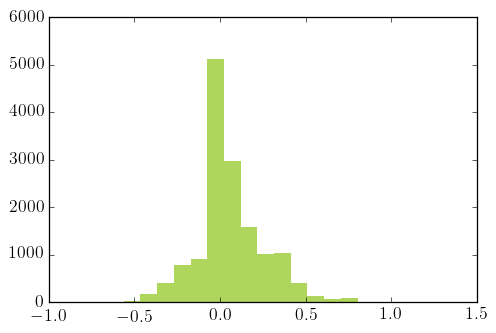

In [8]:
mask = ((table["u_mag"] - table["r_mag"])>2.22)

hist(-table["log_Z_M_spec"][mask]+table["log_Z_M_jpas"][mask], 20, lw=0)

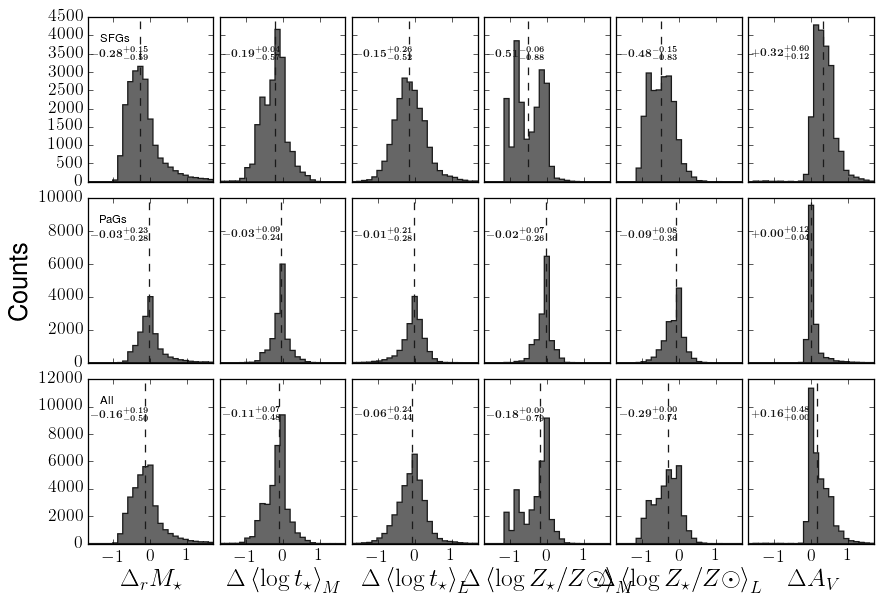

In [9]:
fig, axs = subplots(3, 6, figsize=(10, 7), sharex=True, sharey="row")

lcolor = table["u_mag"]-table["r_mag"]
ln = "M_jpas log_t_M_jpas log_t_L_jpas log_Z_M_jpas log_Z_L_jpas Av_jpas".split()
mn = "M_spec log_t_M_spec log_t_L_spec log_Z_M_spec log_Z_L_spec Av_spec".split()
rl = [True]+5*[False]
res_lbs = [r"$\Delta_r M_\star$", r"$\Delta\left<\log{t_\star}\right>_M$", r"$\Delta\left<\log{t_\star}\right>_L$",
           r"$\Delta\left<\log{Z_\star/Z\odot}\right>_M$", r"$\Delta\left<\log{Z_\star/Z\odot}\right>_L$", r"$\Delta A_V$"]
tsize="9"

lm = xlim(-1.7, +1.7)
axs[0, 0].set_xticks([-1, 0, 1])

for i, j in product(xrange(axs.shape[0]), xrange(axs.shape[1])) :
    if   i == 0 :
        mask = lcolor <  2.22
    elif i == 1 :
        mask = lcolor >= 2.22
        
        if j == 0 : axs[i, j].set_ylabel("Counts")
    else :
        mask = ones(lcolor.size, dtype=bool)
        
        axs[i, j].set_xlabel(res_lbs[j])

    res = err(table[ln[j]], table[mn[j]], rl[j])[mask]
    med = median(res)
    p16, p84 = percentile(res, [16.0, 84.0])

    axs[i, j].hist(res, 25, histtype="stepfilled", fc="0.4", ec="0.1", range=lm)

    axs[i, j].axvline(med, ls="--", color="0.1")

    st_text = r"$\mathbf{%+.2f_{%+.2f}^{%+.2f}}$"%(med, p16, p84)
    axs[i, j].text(0.02, 0.75, st_text, fontsize=tsize, color="0.1", ha="left", transform=axs[i, j].transAxes)

    if j == 0 :
        if i == 0 : axs[i, j].text(0.1, 0.9, "SFGs", fontsize=tsize, ha="left", va="top", transform=axs[i, j].transAxes)
        if i == 1 : axs[i, j].text(0.1, 0.9, "PaGs", fontsize=tsize, ha="left", va="top", transform=axs[i, j].transAxes)
        if i == 2 : axs[i, j].text(0.1, 0.9, "All", fontsize=tsize, ha="left", va="top", transform=axs[i, j].transAxes)

tight_layout()
subplots_adjust(hspace=0.1, wspace=0.05)

savefig("JPAS-SPEC.pdf", bbox_inches="tight")

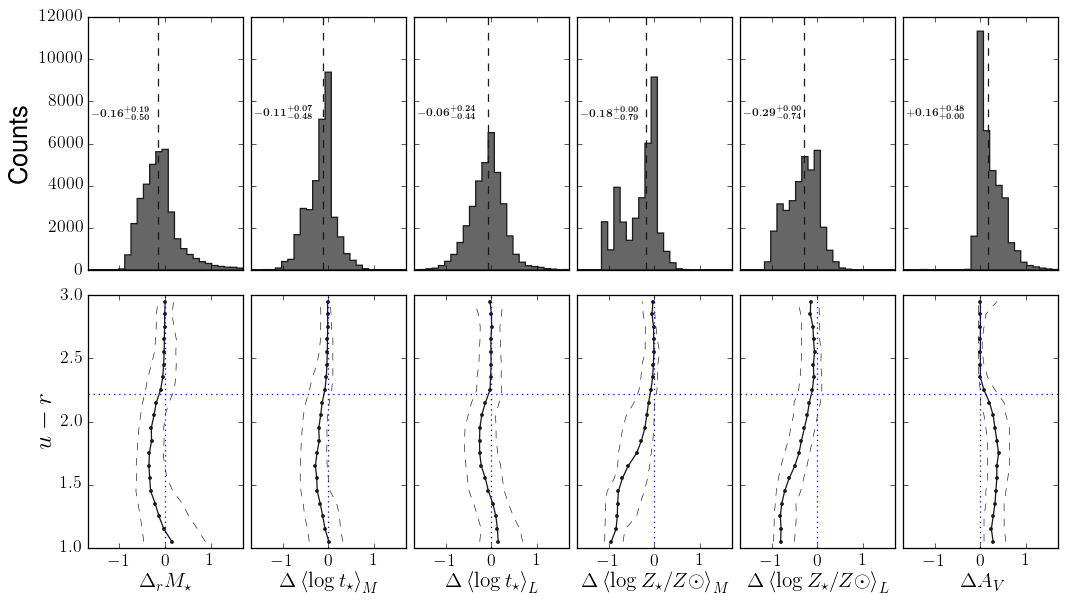

In [14]:
fig, axs = subplots(2, 6, figsize=(12, 7), sharex=True, sharey="row")

lm = xlim(-1.7, +1.7)
axs[0, 0].set_xticks([-1, 0, 1])

for i, j in product(xrange(axs.shape[0]), xrange(axs.shape[1])):
    res = err(table[ln[j]], table[mn[j]], rl[j])
    med = median(res)
    p16, p84 = percentile(res, [16.0, 84.0])
    
    if j == 0:
        if i == 0: axs[i, j].set_ylabel("Counts")
        if i == 1: axs[i, j].set_ylabel(r"$u-r$")
    
    if i == 0:
        axs[i, j].hist(res, 25, range=lm, histtype="stepfilled", fc="0.4", ec="0.1")
        
        axs[i, j].axvline(med, ls="--", color="0.1")
        
        st_text = r"$\mathbf{%+.2f_{%+.2f}^{%+.2f}}$"%(med, p16, p84)
        axs[i, j].text(0.02, 0.60, st_text, fontsize=tsize, color="0.1", ha="left", transform=axs[i, j].transAxes)
    else:
        x, y, e = binner(lcolor, res, "median", 20, rang=(1, 3), ebar=True)

        axs[i, j].plot(y, x, "-o", color="0.1", mew=0, ms=3)
        axs[i, j].plot(y-e[0], x, "--", color="0.1", lw=0.5)
        axs[i, j].plot(y+e[1], x, "--", color="0.1", lw=0.5)
        axs[i, j].axvline(ls=":")
        axs[i, j].axhline(2.22, ls=":")
        
        axs[i, j].set_xlabel(res_lbs[j], size="small")
        axs[i, j].set_ylim(1.0, 3.0)

tight_layout()
subplots_adjust(wspace=0.05, hspace=0.1)

savefig("JPAS-SPEC_2.png", bbox_inches="tight")

(array([  3.40000000e+01,   1.80000000e+01,   2.10000000e+01,
          5.60000000e+01,   1.02000000e+02,   1.43000000e+02,
          2.80000000e+02,   4.90000000e+02,   8.37000000e+02,
          1.30100000e+03,   1.90300000e+03,   2.25100000e+03,
          2.62600000e+03,   2.88400000e+03,   3.07800000e+03,
          2.83500000e+03,   1.87700000e+03,   1.95900000e+03,
          3.40300000e+03,   4.60400000e+03,   3.09300000e+03,
          8.61000000e+02,   1.74000000e+02,   3.60000000e+01,
          1.50000000e+01,   7.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00]),
 array([ 0.        ,  0.13333333,  0.26666667,  0.4       ,  0.53333333,
         0.66666667,  0.8       ,  0.93333333,  1.06666667,  1.2       ,
         1.33333333,  1.46666667,  1.6       ,  1.73333333,  1.86666667,
         2.        ,  2.13333333,  2.26666667,  2.4       ,  2.53333333,
         2.66666667,  2.8       ,  2.93333333,  3.06666667,  3.2       ,
         3.33

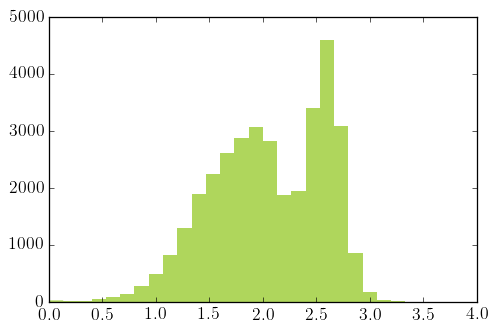

In [11]:
hist(lcolor, 30, range=(0, 4), lw=0)